In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
plt.rcParams['figure.figsize'] = (10, 10)

In [27]:
# Data Reading and Writting
Data = pd.read_csv("dataset.csv")
Data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


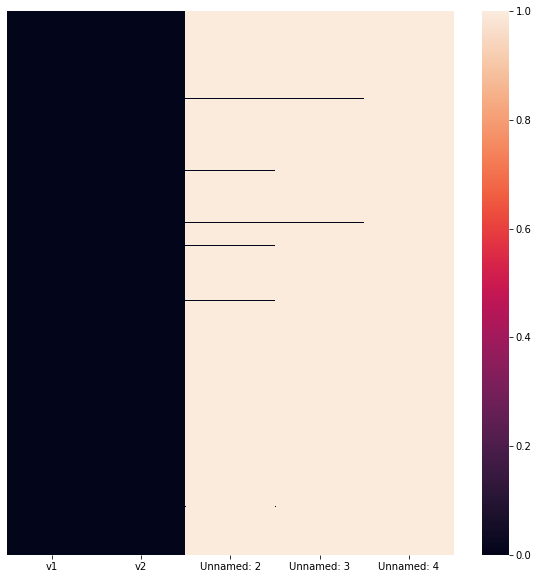

In [29]:
sns.heatmap(Data.isnull(),  yticklabels=False)

In [30]:
Data.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

ham     4825
spam     747
Name: v1, dtype: int64

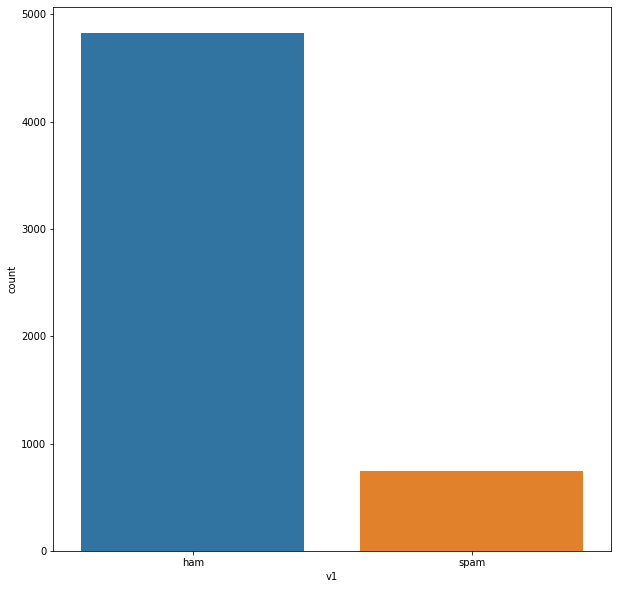

In [31]:
sns.countplot(x ="v1", data = Data)
Data["v1"].value_counts()

In [25]:
Data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [43]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [44]:
Data.head(5)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [45]:
hamdf=Data[Data['spam']==0]
spamdf=Data[Data['spam']==1]

In [46]:
hamdf=hamdf.sample(spamdf.shape[0])
final_dataframe=hamdf.append(spamdf,ignore_index=True)

In [47]:
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, y_train, y_test = train_test_split(final_dataframe["text"],final_dataframe["spam"],test_size=0.2,random_state=0,shuffle=True)

In [49]:
import time
start=time.time()
model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",SVC(C=1000,gamma='auto'))])

In [50]:
model.fit(X_train,y_train)
end=time.time()
print(f"Training Time=={end-start}")

Training Time==14.234726428985596


In [51]:
prediction = model.predict(X_test)


In [52]:
from sklearn.metrics import classification_report


In [53]:
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96       267
           1       0.93      1.00      0.96       281

    accuracy                           0.96       548
   macro avg       0.96      0.96      0.96       548
weighted avg       0.96      0.96      0.96       548



In [54]:
from sklearn.metrics import confusion_matrix


In [55]:
confusion_matrix(y_test,prediction)


array([[247,  20],
       [  1, 280]], dtype=int64)

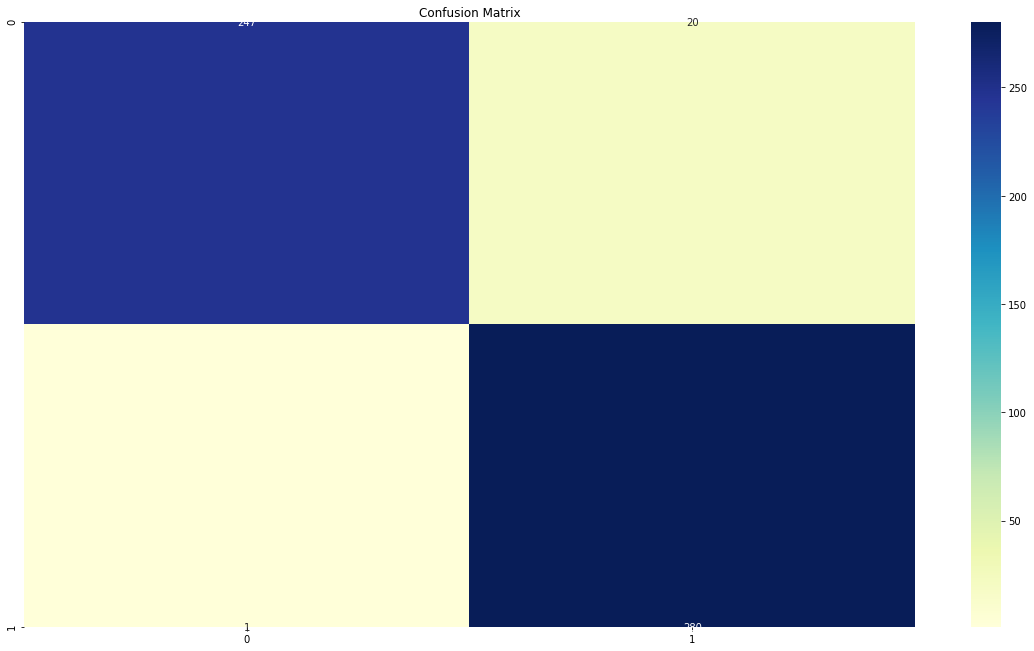

In [56]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction)),annot=True, cmap="YlGnBu" ,fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel=("Actual Labels")
plt.xlabel= ("Predicted Labels")
plt.show()

In [57]:
df = prediction


In [58]:
df = pd.DataFrame(df)


In [59]:
df.head(5)


,0
0,0
1,0
2,0
3,0
4,1


In [60]:
df.rename(columns={0: "Predicted Emails"}, inplace=True)


In [61]:
df.head(5)


,Predicted Emails
0,0
1,0
2,0
3,0
4,1


1    300
0    248
Name: Predicted Emails, dtype: int64

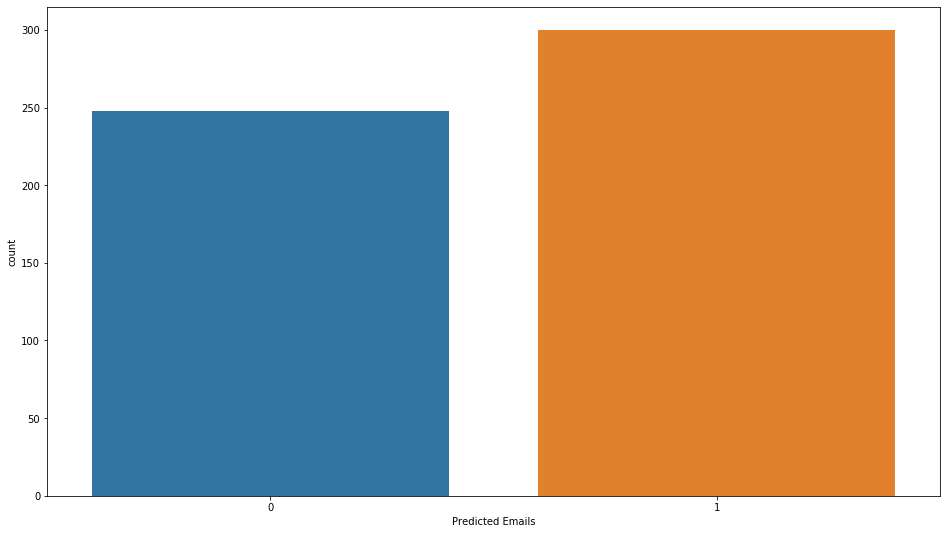

In [62]:
sns.countplot(x = "Predicted Emails", data = df)
df["Predicted Emails"].value_counts()

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print(accuracy_score(prediction,y_test,))

0.9616788321167883
